## Evaluation procedure 1: Train and test on the entire dataset
1. Train the model on the entire dataset
2. Test the model on the same dataset, and evaluate how well we did by comparing the predicted response values with the response values.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

###  Logistic regression

In [2]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
lr.predict(X)

/Users/FY/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/FY/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
y_pred = lr.predict(X)
len(y_pred)

150

Classification accuracy:
+ Proportion of correct predictions
+ Common evaluation metric for classifiction problems

In [4]:
from sklearn import metrics
metrics.accuracy_score(y,y_pred)

0.96

+ Known as training accuracy when you train and test the model on the same data

### KNN (k=5)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
metrics.accuracy_score(y,y_pred)

0.9666666666666667

### KNN (k=1)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
metrics.accuracy_score(y,y_pred)

1.0

### Problems with training and testing on the same data
+ Goal is to estimate likely performance of a model on out-of-sample data
+ But, maximizing training accuracy rewards overly complex models that will not necessarily generalize
+ Unnecessarily complex models overfit the training data

## Evaluation procedure 2: Train/Test split
1. Split the dataset into two pieces: a training set and a testing set
2. Train the model on the training set
3. Test the model on the testing set, and evaluate how well we did

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4) 
# generally use 20%~40% of data as test set

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90, 4), (60, 4), (90,), (60,))

### Logistic regression

In [10]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/FY/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/FY/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9666666666666667

### KNN (k=5)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.95

### KNN (k=1)

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

### Choose the best k

In [14]:
kRange=range(1,25)
scores=[]
for k in kRange:
    knnN=KNeighborsClassifier(n_neighbors=k)
    knnN.fit(X_train,y_train)
    y_pred = knnN.predict(X_test)   
    scores.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

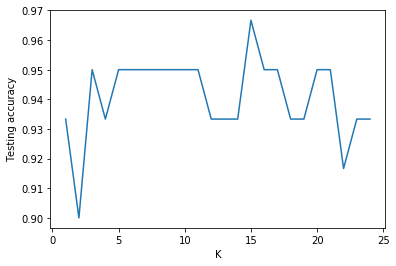

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(kRange,scores)
plt.xlabel('K')
plt.ylabel('Testing accuracy')
# k=15 is best!

## Making prediction out-of-sample data

In [26]:
knn_best = KNeighborsClassifier(n_neighbors=15)
knn_best.fit(X,y)
knn_best.predict([[3,5,4,2]])

array([1])

## Downsides of train/test split
+ Provides a high-variance estimate of out-of-sample accuracy
+ K-fold cross-validation overcomes this limitation
+ But, train/test split is still useful because of its flexibility and speed